In [9]:
using Pkg

Pkg.add("JuMP")
Pkg.add("GLPK")
Pkg.add("BenchmarkTools")
Pkg.add("Distances")
Pkg.add("Plots")
ENV["GUROBI_HOME"] = "/Library/gurobi952/macos_universal2/"
Pkg.add("Gurobi")
Pkg.build("Gurobi")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
   Installed Gurobi ─ v0.11.3
    Updating `~/.julia/environments/v1.7/Project.toml`
  [2e9cd046] + Gurobi v0.11.3
    Updating `~/.julia/environments/v1.7/M

In [64]:
struct Delivery
    x::Float64
    y::Float64
end;
function random_delivery()
    x = rand(0.0:0.1:100.0)
    y = rand(0.0:0.1:100.0)
    return Delivery(x, y)
end;

struct TSProblem
    deliveries::Array{Delivery}
end;

function random_instance(n_deliveries)
    deliveries = [random_delivery() for _=1:n_deliveries]
    problem = TSProblem(deliveries)
    return problem
end;

function dist(del1::Delivery, del2::Delivery)
    return sqrt((del1.x - del2.x)^2 + (del1.y - del2.y)^2)
end
function calc_travelmatrix(deliveries::Array{Delivery})
    tm = zeros(Float64, length(deliveries), length(deliveries))
    for i = 1:length(deliveries)
        for j = 1:length(deliveries)
            tm[i, j] = dist(deliveries[i], deliveries[j])
        end
    end
    return tm
end


calc_travelmatrix (generic function with 1 method)

In [153]:
using Test
function to_edges(matrix::Matrix{Int64})
    width = size(matrix)[2]
    height = size(matrix)[1]
    edges = []
    for row = 1:width, col = 1:height
        if matrix[row, col] == 1
            push!(edges, [row, col])
        end
    end
    return edges
end
test_m = [0 1 0 0; 
          1 0 0 0;
          0 0 0 1;
          0 0 1 0;]

@test to_edges(test_m) == [[1, 2], [2, 1], [3, 4], [4, 3]]

Test Passed
  Expression: to_edges(test_m) == [[1, 2], [2, 1], [3, 4], [4, 3]]
   Evaluated: Any[[1, 2], [2, 1], [3, 4], [4, 3]] == [[1, 2], [2, 1], [3, 4], [4, 3]]

In [209]:
import Pkg
Pkg.add("Graphs")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed SimpleTraits ── v0.9.4
   Installed Inflate ─────── v0.1.2
   Installed ArnoldiMethod ─ v0.2.0
   Installed Graphs ──────── v1.7.1
    Updating `~/.julia/environments/v1.7/Project.toml`
  [86223c79] + Graphs v1.7.1
    Updating `~/.julia/environments/v1.7/Manifest.toml`
  [ec485272] + ArnoldiMethod v0.2.0
  [86223c79] + Graphs v1.7.1
  [d25df0c9] + Inflate v0.1.2
  [699a6c99] + SimpleTraits v0.9.4
  [1a1011a3] + SharedArrays
Precompiling project...
  ✓ Inflate
  ✓ SimpleTraits
  ✓ ArnoldiMethod
  ✓ Graphs
  4 dependencies successfully precompiled in 5 seconds (219 already precompiled, 1 skipped during auto due to previous errors)


In [206]:
"""
given an incidence matrix of a tsp route return nodes of the shortest cycle
"""
function shortest_cycle(matrix::Matrix{Int64})
    edges = to_edges(matrix)
    println(edges)
    shortest_cycle = Set()
    for edge1 in edges
        ed1_nbs = Set([edge1[1], edge1[2]])
        for edge2 in edges
            if edge2[1] in ed1_nbs
                push!(ed1_nbs, edge2[2])
                push!(ed1_nbs, edge2[1])
            elseif edge2[2] in ed1_nbs
                push!(ed1_nbs, edge2[1])
                push!(ed1_nbs, edge2[2])
            end
        end
        shortest = length(shortest_cycle)
        if  shortest == 0 || length(ed1_nbs) < shortest
            shortest_cycle = ed1_nbs
        end
    end
    return collect(shortest_cycle)
end
@test shortest_cycle(test_m) == [2, 1]

Any[[1, 2], [2, 1], [3, 4], [4, 3]]
will add [1, 2]
will add [2, 1]
Set([2, 1])
will add [1, 2]
will add [2, 1]
Set([2, 1])
will add [3, 4]
will add [4, 3]
Set([2, 1])
will add [3, 4]
will add [4, 3]
Set([2, 1])


Test Passed
  Expression: shortest_cycle(test_m) == [2, 1]
   Evaluated: [2, 1] == [2, 1]

In [134]:
test_m_empty = [0 0 0 0; 
          0 0 0 0;
          0 0 0 0;
          0 0 0 0;]
@test shortest_cycle(test_m_empty) == []

Test Passed
  Expression: shortest_cycle(test_m_empty) == []
   Evaluated: Any[] == Any[]

In [135]:
test_m_no_subtours = 
         [0 1 0 0; 
          0 0 1 0;
          0 0 0 1;
          1 0 0 0;]
@test shortest_cycle(test_m_empty) == []

Test Passed
  Expression: shortest_cycle(test_m_empty) == []
   Evaluated: Any[] == Any[]

In [136]:
# taken from a failing random case
test_subtours = 
    [0 0 1 0 0 0;
     0 0 0 0 1 0;
     0 0 0 0 0 1;
     0 1 0 0 0 0;
     0 0 0 1 0 0;
     1 0 0 0 0 0]
@test shortest_cycle(test_subtours) == [6, 3, 1]

Test Passed
  Expression: shortest_cycle(test_subtours) == [6, 3, 1]
   Evaluated: [6, 3, 1] == [6, 3, 1]

In [207]:
# taken from a failing random case
test_subtours2 = 
   [0 0 1 0 0; 
    1 0 0 0 0;
    0 0 0 0 1;
    0 1 0 0 0;
    0 0 0 1 0]
@test shortest_cycle(test_subtours2) == []

Any[[1, 3], [2, 1], [3, 5], [4, 2], [5, 4]]
will add [1, 3]
will add [2, 1]
will add [3, 5]
will add [4, 2]
will add [5, 4]
Set([5, 4, 2, 3, 1])
will add [1, 3]
will add [2, 1]
will add [3, 5]
will add [4, 2]
will add [5, 4]
Set([5, 4, 2, 3, 1])
will add [1, 3]
will add [2, 1]
will add [3, 5]
will add [4, 2]
will add [5, 4]
Set([5, 4, 2, 3, 1])
will add [2, 1]
will add [4, 2]
will add [5, 4]
Set([5, 4, 2, 1])
will add [3, 5]
will add [4, 2]
will add [5, 4]
Set([5, 4, 2, 1])
Test Failed at In[207]:8
  Expression: shortest_cycle(test_subtours2) == []
   Evaluated: [5, 4, 2, 1] == Any[]


LoadError: [91mThere was an error during testing[39m

In [147]:
cycle = shortest_cycle(test_subtours)
[(i, j) for (i, j) in Iterators.product(cycle, cycle) if i < j]

3-element Vector{Tuple{Int64, Int64}}:
 (3, 6)
 (1, 6)
 (1, 3)

Done in 20 iterations
[5, 4, 2, 1]
[0 0 1 0 0; 1 0 0 0 0; 0 0 0 0 1; 0 1 0 0 0; 0 0 0 1 0]


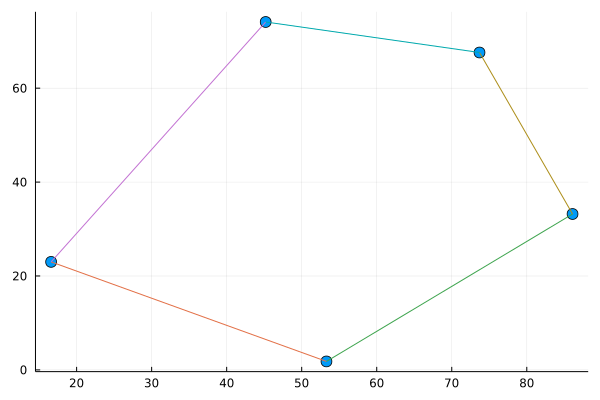

In [198]:
using JuMP
import GLPK
import Gurobi
using BenchmarkTools
using Plots

function has_sub_tours(m, routes)
    x_val = Int64.(JuMP.value.(routes))
    cycle = shortest_cycle(x_val)
    if length(cycle) == 1
        println("found an invalid 1-long cycle $cycle")
    end
    if length(cycle) <= 1
        return false
    end
    indices_to_ban = [(i, j) for (i, j) in Iterators.product(cycle, cycle) if i != j]
    @constraint(m, sum(routes[i, j] for (i,j) in indices_to_ban) <= length(cycle) -1 )
    return true
end

function display_solution(problem, route)
    x_pos = [c.x for c in problem.deliveries]
    y_pos = [c.y for c in problem.deliveries]
    plot_result = scatter(x_pos, y_pos, shape = :circle, markersize = 6)
    for i in 1:length(problem.deliveries)
        for j in 1:length(problem.deliveries)
            val = route[i, j]
            if val > 0
                del1 = problem.deliveries[i]
                del2 = problem.deliveries[j]
                plot!([del1.x, del2.x], [del1.y, del2.y], legend = false)
            end
        end
    end
    return plot_result
end;

function solve_tsp(deliveries::Int64, solver)
    problem=random_instance(deliveries)
    travelmatrix = calc_travelmatrix(problem.deliveries)
    model = Model(solver)
#     set_optimizer_attribute(model, "OutputFlag", 0)
    # route is an adjence matrix representing a route traveled
    route=@variable(model, route[1:length(problem.deliveries), 1:length(problem.deliveries)], Bin)

    # ensure all events are planned
    @constraint(model, [i = 1:length(problem.deliveries)], sum(route[i, :]) == 1.0)
    @constraint(model, [c = 1:length(problem.deliveries)], sum(route[:, c]) == 1.0)
    # disallow traveling to itself
    @constraint(model, [j = 1:length(problem.deliveries)], route[j, j] == 0)

    traveltime = travelmatrix.* route 
    @objective(model, Min, sum(traveltime))
    set_time_limit_sec(model, 60.0)
    optimize!(model)
    route_val = JuMP.value.(route)
    routes_copy = deepcopy(route_val)
    iterations =0
    max_iter = 20
    while has_sub_tours(model, route)
        optimize!(model)
#         println(model)
        route_val = JuMP.value.(route)
#         println(route_val)
        if iterations >= max_iter
            break
        end
        iterations += 1
    end
    println("Done in $iterations iterations")
    val= Int64.(JuMP.value.(route))
    println(shortest_cycle(val))
    println(val)
    return display_solution(problem, route_val)
end

solve_tsp(5, GLPK.Optimizer)


In [162]:
gmod

In [14]:
@benchmark solve_tsp(20, GLPK.Optimizer) evals=3 samples=20 seconds=3600

BenchmarkTools.Trial: 20 samples with 3 evaluations.
 Range (min … max):   49.265 ms …    2.590 s  ┊ GC (min … max): 0.00% … 0.08%
 Time  (median):     374.093 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   529.068 ms ± 570.773 ms  ┊ GC (mean ± σ):  0.15% ± 0.25%

  ██▁▁▁▁▁█ ▁ █  ▁  ▁ █     ▁                                  ▁  
  ████████▁█▁█▁▁█▁▁█▁█▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  49.3 ms          Histogram: frequency by time          2.59 s <

 Memory estimate: 5.99 MiB, allocs estimate: 218079.

In [4]:
@benchmark solve_tsp(21, GLPK.Optimizer) evals=3 samples=20 seconds=3600

BenchmarkTools.Trial: 20 samples with 3 evaluations.
 Range (min … max):   73.846 ms … 4.737 s  ┊ GC (min … max): 0.00% … 0.03%
 Time  (median):     595.524 ms            ┊ GC (median):    0.23%
 Time  (mean ± σ):   892.395 ms ± 1.063 s  ┊ GC (mean ± σ):  0.10% ± 0.43%

  █ ▁   ▁                                                     
  █▆█▆▆▁█▆▁▆▁▁▆▆▆▆▁▆▁▁▁▁▁▁▁▆▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▆ ▁
  73.8 ms        Histogram: frequency by time         4.74 s <

 Memory estimate: 6.69 MiB, allocs estimate: 263043.

In [5]:
@benchmark solve_tsp(22, GLPK.Optimizer) evals=3 samples=20 seconds=3600

BenchmarkTools.Trial: 20 samples with 3 evaluations.
 Range (min … max):  110.582 ms … 9.828 s  ┊ GC (min … max): 0.00% … 0.02%
 Time  (median):        1.917 s            ┊ GC (median):    0.07%
 Time  (mean ± σ):      2.719 s ± 2.701 s  ┊ GC (mean ± σ):  0.05% ± 0.19%

  █▃        ▃▃             ▃                                  
  ██▇▇▁▁▁▇▁▁██▇▁▁▁▁▁▁▇▁▁▁▁▁█▁▁▁▁▇▁▁▁▁▁▇▁▁▁▁▁▇▁▁▁▁▁▁▁▁▁▁▁▁▁▁▇ ▁
  111 ms         Histogram: frequency by time         9.83 s <

 Memory estimate: 9.02 MiB, allocs estimate: 347515.

In [21]:
@benchmark solve_tsp(20, Gurobi.Optimizer) evals=3 samples=20 seconds=3600

Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to v

BenchmarkTools.Trial: 20 samples with 3 evaluations.
 Range (min … max):  261.217 ms …    4.081 s  ┊ GC (min … max): 0.00% … 0.05%
 Time  (median):     982.174 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):      1.139 s ± 958.876 ms  ┊ GC (mean ± σ):  0.08% ± 0.10%

  █  ▄       ▁    ▁     ▁                                        
  █▁▁█▁▁▆▁▆▁▁█▁▆▆▁█▁▁▁▆▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▆▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▆ ▁
  261 ms           Histogram: frequency by time          4.08 s <

 Memory estimate: 5.95 MiB, allocs estimate: 219053.

In [22]:
@benchmark solve_tsp(21, Gurobi.Optimizer) evals=3 samples=20 seconds=3600

Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to v

BenchmarkTools.Trial: 20 samples with 3 evaluations.
 Range (min … max):  272.636 ms … 7.167 s  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):        1.340 s            ┊ GC (median):    0.08%
 Time  (mean ± σ):      1.913 s ± 1.656 s  ┊ GC (mean ± σ):  0.06% ± 0.19%

  ▃  ▃   █             ▃                                      
  █▁▁█▇▇▁█▇▇▁▁▇▇▇▇▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▇▇▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▇ ▁
  273 ms         Histogram: frequency by time         7.17 s <

 Memory estimate: 6.68 MiB, allocs estimate: 247805.

In [23]:
@benchmark solve_tsp(22, Gurobi.Optimizer) evals=3 samples=20 seconds=3600

Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to v

BenchmarkTools.Trial: 20 samples with 3 evaluations.
 Range (min … max):  391.703 ms … 7.620 s  ┊ GC (min … max): 0.00% … 0.03%
 Time  (median):        1.755 s            ┊ GC (median):    0.12%
 Time  (mean ± σ):      2.459 s ± 2.099 s  ┊ GC (mean ± σ):  0.06% ± 0.07%

  █ █▁█    █▁█    ▁ ▁▁          ▁▁ ▁                   ▁   ▁  
  █▁███▁▁▁▁███▁▁▁▁█▁██▁▁▁▁▁▁▁▁▁▁██▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁█ ▁
  392 ms         Histogram: frequency by time         7.62 s <

 Memory estimate: 8.84 MiB, allocs estimate: 348262.

In [ ]:
@benchmark solve_tsp(25, Gurobi.Optimizer) evals=3 samples=20 seconds=3600